# Análise Exploratória e Feature Engineering

In [166]:
# Importando bibliotecas
import sweetviz as sv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from unidecode import unidecode
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

In [167]:
# Ler o arquivo CSV
df = pd.read_csv('https://raw.githubusercontent.com/Univesp-PI-2022/projeto-integrador-4/main/dados/censo1.csv',sep=";")
df.head(3)

,ID,Situação de rua,Onde dormiu ontem,Tempo de permanência,Sexo,Identifica com o sexo nasceu,Idade,Faixa de idade,Classificação de idade,Cor_Raça_Etnia,Parentes no CA,Tempo na situação,Tipo de ponto,Presença_Moradia_Improvisada,Criança_acomp_Adulto,Criança_Sozinha,Latitude,Longitude,Data,Subprefeitura,Distrito
0,1,Rua,Não se aplica,Não se aplica,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,Não informado,NR/NS,Praça,Não,Não,Não,"-23,4962781999999","-46,391831",10/25/21,Itaim Paulista,Itaim Paulista
1,2,Acolhido,Rua,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,Sim,Mais de 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,"-23,5225168","-46,522712",10/25/21,Penha,Penha
2,3,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,27,18 a 30,Juventude,Parda,Sim,Mais de 2 anos até 5 anos,Praça,Sim,Não,Não,"-23,5232932","-46,6549845",11/3/21,Sé,Santa Cecília


In [168]:
df.shape

(31884, 21)

In [169]:
#Verificando período da base
print(f'data mínima: {df.Data.min()}')
print(f'data máxima: {df.Data.max()}')

data mínima: 10/11/21
data máxima: 11/9/21


In [170]:
df.columns

Index(['ID', 'Situação de rua', 'Onde dormiu ontem', 'Tempo de permanência',
       'Sexo', 'Identifica com o sexo nasceu', 'Idade', 'Faixa de idade',
       'Classificação de idade', 'Cor_Raça_Etnia', 'Parentes no CA',
       'Tempo na situação', 'Tipo de ponto', 'Presença_Moradia_Improvisada',
       'Criança_acomp_Adulto', 'Criança_Sozinha', 'Latitude', 'Longitude',
       'Data', 'Subprefeitura', 'Distrito'],
      dtype='object')

In [171]:
# Renomeando colunas (as originais possuem elementos que podem dificultar na evolução do trabalho)
new_column_names = {
    'ID': 'id',
    'Situação de rua': 'situac',
    'Onde dormiu ontem': 'onde_dormiu_ontem',
    'Tempo de permanência': 'tempo_perman',
    'Sexo': 'sexo',
    'Identifica com o sexo nasceu': 'sexo_nasc',
    'Idade': 'idade',
    'Faixa de idade': 'faixa_idade',
    'Classificação de idade': 'class_idade',
    'Cor_Raça_Etnia': 'cor_raca_etnia',
    'Parentes no CA': 'parentes_ca',
    'Tempo na situação': 'tempo_situac',
    'Tipo de ponto': 'tipo_ponto',
    'Presença_Moradia_Improvisada': 'moradia_impro',
    'Criança_acomp_Adulto': 'crianca_acomp',
    'Criança_Sozinha': 'crianca_sozinha',
    'Latitude': 'lat',
    'Longitude': 'lon',
    'Data': 'Data',
    'Subprefeitura': 'subpref',
    'Distrito': 'distrito'
}

df = df.rename(columns=new_column_names)

In [172]:
df.dtypes

id                    int64
situac               object
onde_dormiu_ontem    object
tempo_perman         object
sexo                 object
sexo_nasc            object
idade                object
faixa_idade          object
class_idade          object
cor_raca_etnia       object
parentes_ca          object
tempo_situac         object
tipo_ponto           object
moradia_impro        object
crianca_acomp        object
crianca_sozinha      object
lat                  object
lon                  object
Data                 object
subpref              object
distrito             object
dtype: object

In [173]:
df['Data'] = pd.to_datetime(df['Data'])

In [174]:
df.head(3)

,id,situac,onde_dormiu_ontem,tempo_perman,sexo,sexo_nasc,idade,faixa_idade,class_idade,cor_raca_etnia,parentes_ca,tempo_situac,tipo_ponto,moradia_impro,crianca_acomp,crianca_sozinha,lat,lon,Data,subpref,distrito
0,1,Rua,Não se aplica,Não se aplica,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,Não informado,NR/NS,Praça,Não,Não,Não,"-23,4962781999999","-46,391831",2021-10-25,Itaim Paulista,Itaim Paulista
1,2,Acolhido,Rua,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,Sim,Mais de 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,"-23,5225168","-46,522712",2021-10-25,Penha,Penha
2,3,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,27,18 a 30,Juventude,Parda,Sim,Mais de 2 anos até 5 anos,Praça,Sim,Não,Não,"-23,5232932","-46,6549845",2021-11-03,Sé,Santa Cecília


In [175]:
df[df.duplicated()]

,id,situac,onde_dormiu_ontem,tempo_perman,sexo,sexo_nasc,idade,faixa_idade,class_idade,cor_raca_etnia,parentes_ca,tempo_situac,tipo_ponto,moradia_impro,crianca_acomp,crianca_sozinha,lat,lon,Data,subpref,distrito


Não existem ocorrências duplicadas

# Nulos

In [176]:
df.isnull().sum()

id                     0
situac                 0
onde_dormiu_ontem      0
tempo_perman           0
sexo                   0
sexo_nasc              0
idade                  0
faixa_idade            0
class_idade            0
cor_raca_etnia         0
parentes_ca            0
tempo_situac           0
tipo_ponto             0
moradia_impro          0
crianca_acomp          0
crianca_sozinha        0
lat                  167
lon                  167
Data                   0
subpref                0
distrito               0
dtype: int64

Parece que temos nulos apenas em latitude e longitude, porém se faz necessário observar mais profundamente

In [177]:
for coluna in df.columns:
    print(f'{coluna}\n{df[coluna].unique()}\n\n')

id
[    1     2     3 ... 31882 31883 31884]


situac
['Rua' 'Acolhido']


onde_dormiu_ontem
['Não se aplica' 'Rua' 'Neste centro de acolhida (aqui)'
 'Não respondeu/Não sabe' 'Outro' 'Casa própria' 'Casa de amigos/parentes'
 'Outro centro de acolhida']


tempo_perman
['Não se aplica' 'Mais de 6 meses' 'Entre 1 e 2 semanas'
 'Entre 1 mês e 3 meses' 'Entre 3 meses e 6 meses'
 'Não respondeu/Não sabe' 'Até 1 semana' 'Entre 2 semanas e 1 mês']


sexo
['Feminino' 'Masculino' 'Sem identificação']


sexo_nasc
['Não respondeu' 'Homem Cisgênero' 'Mulher Cisgênero' 'Agênero' 'Outra'
 'Mulher Transexual' 'Travesti' 'Homem Transexual' 'Não Binário']


idade
['Não respondeu' '38' '27' '15' '43' '44' '50' '64' '53' '32' '65' '40'
 '35' '22' '6' '39' '54' '46' '11' '51' '19' '20' '47' '41' '60' '70' '45'
 '23' '34' '1' '49' '52' '30' '68' '37' '42' '58' '25' '67' '29' '56' '36'
 '55' '28' '57' '33' '31' '72' '26' '66' '48' '69' '24' '59' '61' '84'
 '76' '21' '63' '18' '7' '73' '75' '14' '62' '81' '7

Mesmo parecendo ter nulos só em latitude e longitude, podemos ver que na verdade temos cateegorias dentro de praticamente todas as colunas que poderiam ser consideradas nulas

### Transformando em nulo

sexo - 'Sem identificação'<br>
sexo_nasc - 'Não respondeu'<br>
idade - 'Não respondeu'<br>
faixa_idade - 'Sem informação'<br>
class_idade - 'Sem informação'<br>
cor_raca_etnia - 'Sem informação', 'Não respondeu'<br>
parentes_ca - 'Não informado'<br>
tempo_situac - 'NR/NS'<br>
modaria_impro - 'Não observado' <br>
crianca_acomp -  'Não observado'<br>
crianca_sozinha - 'Não observado'<br>
[*] Ver se vale juntar o "não se aplica" com o "não"<br>

In [178]:
# removendo acentos e caracteres especiais
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].applymap(lambda x: unidecode(str(x)))

In [179]:
alteracoes_nulo = {
    'onde_dormiu_ontem': ['Nao respondeu/Nao sabe'],
    'tempo_perman': ['Nao respondeu/Nao sabe'],
    'sexo': ['Sem identificacao'],
    'sexo_nasc': ['Nao respondeu'],
    'idade': ['Nao respondeu'],
    'faixa_idade': ['Sem informacao'],
    'class_idade': ['Sem informacao'],
    'cor_raca_etnia': ['Sem informacao', 'Nao respondeu'],
    'parentes_ca': ['Nao informado'],
    'tempo_situac': ['NR/NS'],    
    'moradia_impro': ['Nao observado'],
    'crianca_acomp': ['Nao observado'],
    'crianca_sozinha': ['Nao observado']
}

for column, values in alteracoes_nulo.items():
    df.loc[df[column].isin(values), column] = None

In [180]:
# Substituindo os valores
df.loc[df["moradia_impro"] == "Nao se aplica", "moradia_impro"] = "Nao"
df.loc[df["crianca_acomp"] == "Nao se aplica", "crianca_acomp"] = "Nao"
df.loc[df["crianca_sozinha"] == "Nao se aplica", "crianca_sozinha"] = "Nao"

In [181]:
100 * df.isnull().sum() / len(df)

id                   0.00
situac               0.00
onde_dormiu_ontem    4.87
tempo_perman         5.70
sexo                 3.32
sexo_nasc           31.42
idade               30.75
faixa_idade         30.75
class_idade         30.75
cor_raca_etnia       1.24
parentes_ca         33.31
tempo_situac        28.04
tipo_ponto           0.00
moradia_impro        0.59
crianca_acomp        1.77
crianca_sozinha      2.24
lat                  0.00
lon                  0.00
Data                 0.00
subpref              0.00
distrito             0.00
dtype: float64

In [182]:
df.isnull().sum()

id                       0
situac                   0
onde_dormiu_ontem     1552
tempo_perman          1817
sexo                  1058
sexo_nasc            10017
idade                 9805
faixa_idade           9805
class_idade           9805
cor_raca_etnia         395
parentes_ca          10619
tempo_situac          8940
tipo_ponto               0
moradia_impro          188
crianca_acomp          563
crianca_sozinha        714
lat                      0
lon                      0
Data                     0
subpref                  0
distrito                 0
dtype: int64

Agora vemos a real distribuição de nulos. Podemos acabar perdendo muita informação ao excluir os nulos, pois a idade, por exemplo, tem 30% de nulos, então para alguns casos, teremos que inviabilizar o uso da coluna para a modelagem.<br>
- sexo: excluir nulos (1058 ocorrências)
- cor_raca_etnia: excluir nulos (395 ocorrências)
- moradia_impro: excluir nulos (188 ocorrências)
- crianca_acomp: excluir nulos (563 ocorrências)
- crianca_sozinha: excluir nulos (714 ocorrências)
- onde_dormiu_ontem: excluir nulos (1552 ocorrências)
- tempo_perman: excluir nulos (1817 ocorrências)

- sexo_nasc: não utilizar a coluna
- idade: não utilizar a coluna
- faixa_idade: não utilizar a coluna
- class_idade: não utilizar a coluna
- parentes_ca: não utilizar a coluna
- tempo_situac: não utilizar a coluna


Acabamos perdendo 2 informações que poderiam ser interessantes para um modelo, então podemos ver de fazer um segundo modelo só com aqueles que tem informação de idade e tempo em situação de rua.

### Tratando nulos

In [183]:
qtd_inc = len(df)

df.dropna(subset=['sexo', 'cor_raca_etnia', 'moradia_impro', 'crianca_acomp', 'crianca_sozinha', 'onde_dormiu_ontem', 'tempo_perman'], inplace=True)

print(f'Quantidade inicial: {qtd_inc} \nQuantidade final: {len(df)}\n% diminuição:{100 - (len(df)/qtd_inc * 100)}')

Quantidade inicial: 31884 
Quantidade final: 27749
% diminuição:12.968887216158578


In [184]:
df.head(3)

,id,situac,onde_dormiu_ontem,tempo_perman,sexo,sexo_nasc,idade,faixa_idade,class_idade,cor_raca_etnia,parentes_ca,tempo_situac,tipo_ponto,moradia_impro,crianca_acomp,crianca_sozinha,lat,lon,Data,subpref,distrito
0,1,Rua,Nao se aplica,Nao se aplica,Feminino,None,None,None,None,Sem identificacao,None,None,Praca,Nao,Nao,Nao,"-23,4962781999999","-46,391831",2021-10-25,Itaim Paulista,Itaim Paulista
1,2,Acolhido,Rua,Nao se aplica,Masculino,Homem Cisgenero,38,31 a 49,Adulto,Parda,Sim,Mais de 10 anos,Nao se aplica,Nao,Nao,Nao,"-23,5225168","-46,522712",2021-10-25,Penha,Penha
2,3,Rua,Nao se aplica,Nao se aplica,Feminino,Mulher Cisgenero,27,18 a 30,Juventude,Parda,Sim,Mais de 2 anos ate 5 anos,Praca,Sim,Nao,Nao,"-23,5232932","-46,6549845",2021-11-03,Se,Santa Cecilia


Até aqui, a preparação dos dados está correta e finalizada

## Inserindo dados meteorológicos extraídos do INMET
https://portal.inmet.gov.br/dadoshistoricos

In [185]:
df_temp = pd.read_csv('dado_meteorologico.csv', sep = ';')

In [186]:
df_temp.head(3)

,Data,PRECIPITACAO_TOTAL_MM,TEMP_AR_C,PCT_UMIDADE_RELATIVA_AR,VENTO_m_s
0,01/01/2021,0.00,20.10,96.00,2.00
1,01/01/2021,0.00,19.60,96.00,1.60
2,01/01/2021,0.00,19.60,96.00,1.20


In [187]:
df_temp['Data'] = pd.to_datetime(df_temp['Data'], format='%d/%m/%Y')

# agrupar os dados por dia
df_temp_dia = df_temp.groupby(df_temp['Data'].dt.date).agg({
    'PRECIPITACAO_TOTAL_MM': 'sum',
    'TEMP_AR_C': ['max', 'min'],
    'PCT_UMIDADE_RELATIVA_AR': ['max', 'min'],
    'VENTO_m_s': 'max'
})

# renomear as colunas
df_temp_dia.columns = ['precipitacao_total', 'temp_max', 'temp_min', 'umidade_max', 'umidade_min', 'vel_max_vento']
df_temp_dia = df_temp_dia.reset_index()
df_temp_dia['Data'] = pd.to_datetime(df_temp_dia['Data'], format='%Y/%m/%d')

In [188]:
df_temp_dia.dtypes

Data                  datetime64[ns]
precipitacao_total           float64
temp_max                     float64
temp_min                     float64
umidade_max                  float64
umidade_min                  float64
vel_max_vento                float64
dtype: object

In [189]:
df_temp_dia.head(3)

,Data,precipitacao_total,temp_max,temp_min,umidade_max,umidade_min,vel_max_vento
0,2021-01-01,0.40,26.50,19.20,98.00,64.00,3.70
1,2021-01-02,1.00,21.40,18.60,98.00,85.00,3.40
2,2021-01-03,0.40,23.40,17.50,96.00,71.00,4.70


In [190]:
df = pd.merge(df, df_temp_dia, on='Data', how='left')

In [191]:
df.head(3)

,id,situac,onde_dormiu_ontem,tempo_perman,sexo,sexo_nasc,idade,faixa_idade,class_idade,cor_raca_etnia,parentes_ca,tempo_situac,tipo_ponto,moradia_impro,crianca_acomp,crianca_sozinha,lat,lon,Data,subpref,distrito,precipitacao_total,temp_max,temp_min,umidade_max,umidade_min,vel_max_vento
0,1,Rua,Nao se aplica,Nao se aplica,Feminino,None,None,None,None,Sem identificacao,None,None,Praca,Nao,Nao,Nao,"-23,4962781999999","-46,391831",2021-10-25,Itaim Paulista,Itaim Paulista,0.00,18.40,13.90,100.00,72.00,4.20
1,2,Acolhido,Rua,Nao se aplica,Masculino,Homem Cisgenero,38,31 a 49,Adulto,Parda,Sim,Mais de 10 anos,Nao se aplica,Nao,Nao,Nao,"-23,5225168","-46,522712",2021-10-25,Penha,Penha,0.00,18.40,13.90,100.00,72.00,4.20
2,3,Rua,Nao se aplica,Nao se aplica,Feminino,Mulher Cisgenero,27,18 a 30,Juventude,Parda,Sim,Mais de 2 anos ate 5 anos,Praca,Sim,Nao,Nao,"-23,5232932","-46,6549845",2021-11-03,Se,Santa Cecilia,1.00,22.20,16.80,100.00,69.00,4.60


In [126]:
report_pi_4 = sv.analyze(df)
# salvando o relatório em um arquivo HTML
report_pi_4.show_html('relatorio_pi_4.html')

                                             |                                             | [  0%]   00:00 ->…

Report relatorio_pi_4.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [194]:
df = df.sort_values(by='Data')
count_by_date = pd.DataFrame(df.groupby('Data').size().reset_index())
count_by_date['Data'] = count_by_date['Data'].dt.strftime('%d/%m/%Y')

In [195]:
count_by_date

,Data,0
0,11/10/2021,3
1,14/10/2021,138
2,15/10/2021,292
3,16/10/2021,40
4,20/10/2021,453
5,21/10/2021,1768
6,22/10/2021,716
7,23/10/2021,11
8,25/10/2021,1281
9,26/10/2021,1710


In [200]:
count_by_date.columns

Index(['Data', 0], dtype='object')

In [196]:

df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')

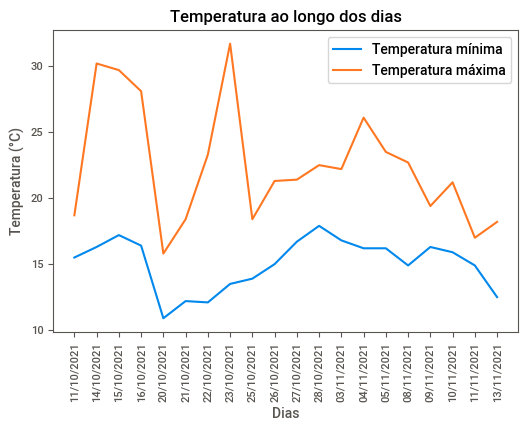

In [202]:
plt.plot(df['Data'], df['temp_min'])
plt.plot(df['Data'], df['temp_max'])
plt.xticks(rotation=90)
plt.title('Temperatura ao longo dos dias')
plt.xlabel('Dias')
plt.ylabel('Temperatura (°C)')
plt.legend(['Temperatura mínima', 'Temperatura máxima'])
plt.show()

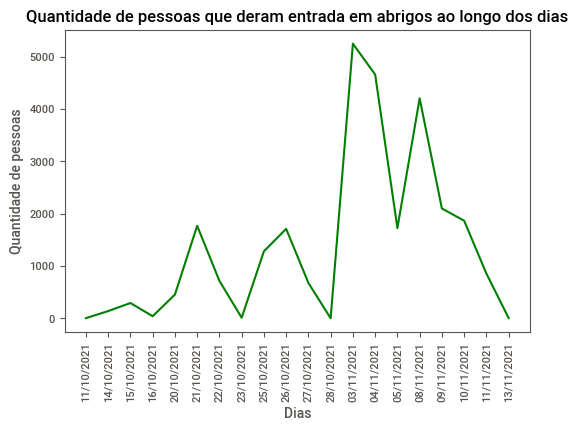

In [210]:
plt.plot(count_by_date['Data'], count_by_date[0], color='green')
plt.xticks(rotation=90)
plt.title('Quantidade de pessoas que deram entrada em abrigos ao longo dos dias')
plt.xlabel('Dias')
plt.ylabel('Quantidade de pessoas')
plt.show()

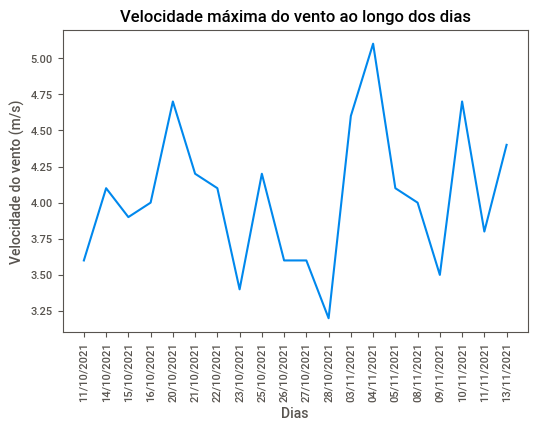

In [205]:
plt.plot(df['Data'], df['vel_max_vento'])
plt.xticks(rotation=90)
plt.title('Velocidade máxima do vento ao longo dos dias')
plt.xlabel('Dias')
plt.ylabel('Velocidade do vento (m/s)')
plt.show()

In [66]:
df.columns

Index(['id', 'situac', 'onde_dormiu_ontem', 'tempo_perman', 'sexo',
       'sexo_nasc', 'idade', 'faixa_idade', 'class_idade', 'cor_raca_etnia',
       'parentes_ca', 'tempo_situac', 'tipo_ponto', 'moradia_impro',
       'crianca_acomp', 'crianca_sozinha', 'lat', 'lon', 'Data', 'subpref',
       'distrito', 'precipitacao_total', 'temp_max', 'temp_min', 'umidade_max',
       'umidade_min', 'vel_max_vento'],
      dtype='object')

In [70]:
count_by_date

Data
03/11/2021    5249
04/11/2021    4660
05/11/2021    1724
08/11/2021    4204
09/11/2021    2099
10/11/2021    1865
11/10/2021       3
11/11/2021     855
13/11/2021       4
14/10/2021     138
15/10/2021     292
16/10/2021      40
20/10/2021     453
21/10/2021    1768
22/10/2021     716
23/10/2021      11
25/10/2021    1281
26/10/2021    1710
27/10/2021     676
28/10/2021       1
dtype: int64

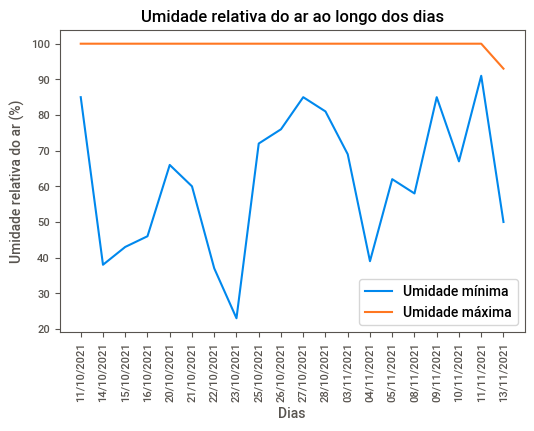

In [207]:
plt.plot(df['Data'], df['umidade_min'])
plt.plot(df['Data'], df['umidade_max'])
plt.xticks(rotation=90)
plt.title('Umidade relativa do ar ao longo dos dias')
plt.xlabel('Dias')
plt.ylabel('Umidade relativa do ar (%)')
plt.legend(['Umidade mínima', 'Umidade máxima'])
plt.show()